#### Importing the libraries

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, regularizers
import matplotlib.colors as mcolors
import seaborn as sns
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#### loading and displaying the datasets

In [86]:
train=pd.read_csv('SQLIV3_cleaned2.csv')
test=pd.read_csv('sqliv2_utf8.csv')
print(train)

                                                Sentence  Label
0                      " or pg_sleep  (  __TIME__  )  --      1
1      create user name identified by pass123 tempora...      1
2       AND 1  =  utl_inaddr.get_host_address   (    ...      1
3       select * from users where id  =  '1' or @ @1 ...      1
4       select * from users where id  =  1 or 1#"  ( ...      1
...                                                  ...    ...
30609              DELETE FROM door WHERE grow = 'small'      0
30610                               DELETE FROM tomorrow      0
30611                       SELECT wide ( s )  FROM west      0
30612       SELECT * FROM  ( SELECT slide FROM breath )       0
30613                           SELECT TOP 3 * FROM race      0

[30614 rows x 2 columns]


In [87]:
train.Label.value_counts()


,count
Label,
0,19268
1,11346


#### 'Label' Data Distribution


<ipython-input-88-3937f5fac716>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train, ax=ax[1], palette=colors)
<ipython-input-88-3937f5fac716>:7: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='Label', data=train, ax=ax[1], palette=colors)


Text(0.5, 1.0, 'Label')

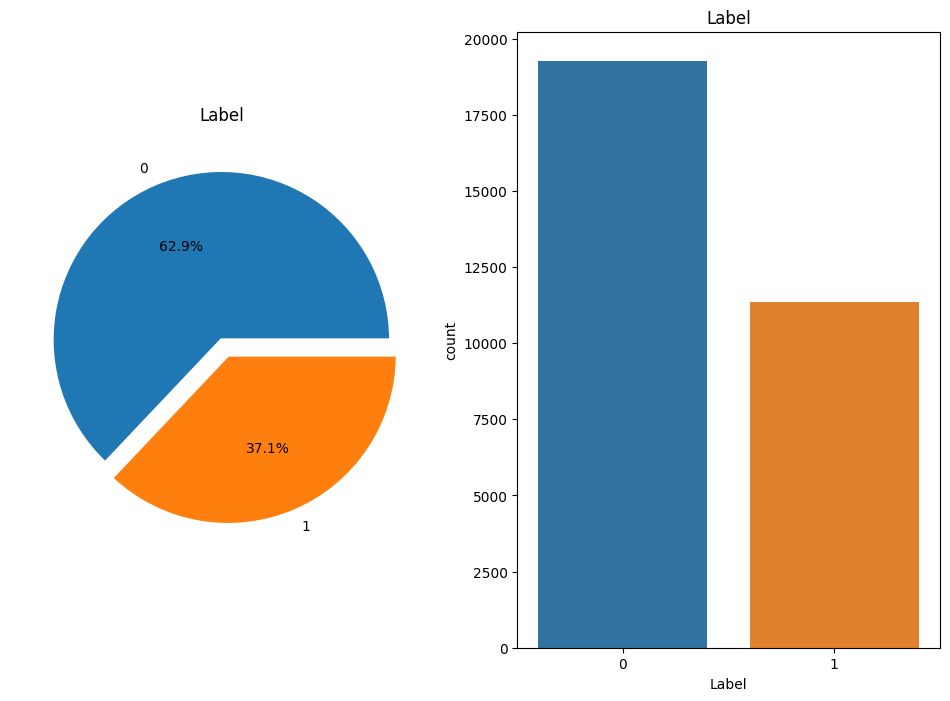

In [88]:
f, ax = plt.subplots(1, 2, figsize=(12, 8))
colors = list(mcolors.TABLEAU_COLORS.values())
train['Label'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True}, colors=colors)

ax[0].set_title('Label')
ax[0].set_ylabel('')
sns.countplot(x='Label', data=train, ax=ax[1], palette=colors)
ax[1].set_title('Label')

In [ ]:
from sklearn.model_selection import train_test_split

X = train['Sentence'].values
y = train['Label'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#### Text Vectorization

In [90]:
vectorizer = TfidfVectorizer(max_features=3000)
X_train = vectorizer.fit_transform(X_train).toarray()
X_val = vectorizer.transform(X_val).toarray()

#### Model Configuration

In [91]:
hidden_units1=512
hidden_units2=256
hidden_units3=128
learning_rate=0.01
hidden_layer_act='relu'
output_layer_act='sigmoid'
no_epochs=27

In [92]:
model = Sequential()
model.add(Dense(hidden_units1, input_dim=3000, activation=hidden_layer_act))
model.add(Dense(hidden_units2, activation=hidden_layer_act))
model.add(Dense(hidden_units3, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilation

In [93]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

#### Model training

In [94]:
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

In [95]:
history = model.fit(X_train, y_train,
                    epochs=no_epochs,
                    batch_size=32,
                    verbose=2,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/27
766/766 - 4s - 6ms/step - accuracy: 0.6284 - loss: 0.6463 - val_accuracy: 0.6309 - val_loss: 0.6149
Epoch 2/27
766/766 - 3s - 4ms/step - accuracy: 0.7040 - loss: 0.5501 - val_accuracy: 0.8811 - val_loss: 0.4121
Epoch 3/27
766/766 - 2s - 3ms/step - accuracy: 0.9241 - loss: 0.2813 - val_accuracy: 0.9780 - val_loss: 0.1316
Epoch 4/27
766/766 - 3s - 3ms/step - accuracy: 0.9584 - loss: 0.1373 - val_accuracy: 0.9873 - val_loss: 0.0732
Epoch 5/27
766/766 - 3s - 3ms/step - accuracy: 0.9651 - loss: 0.0959 - val_accuracy: 0.9895 - val_loss: 0.0528
Epoch 6/27
766/766 - 2s - 3ms/step - accuracy: 0.9735 - loss: 0.0752 - val_accuracy: 0.9910 - val_loss: 0.0445
Epoch 7/27
766/766 - 2s - 3ms/step - accuracy: 0.9813 - loss: 0.0623 - val_accuracy: 0.9933 - val_loss: 0.0363
Epoch 8/27
766/766 - 2s - 3ms/step - accuracy: 0.9871 - loss: 0.0534 - val_accuracy: 0.9940 - val_loss: 0.0322
Epoch 9/27
766/766 - 3s - 4ms/step - accuracy: 0.9902 - loss: 0.0472 - val_accuracy: 0.9904 - val_loss: 0.0388
E

#### Final Training Metrics Display

In [96]:

print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])



Final Training Loss: 0.029541833326220512
Final Training Accuracy: 0.9950186014175415


192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report (validation):
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3863
           1       1.00      0.99      0.99      2260

    accuracy                           0.99      6123
   macro avg       0.99      0.99      0.99      6123
weighted avg       0.99      0.99      0.99      6123

Évaluation on validation set :
Accuracy:  0.9944
Precision: 0.9951
Recall:    0.9898
F1 Score:  0.9925


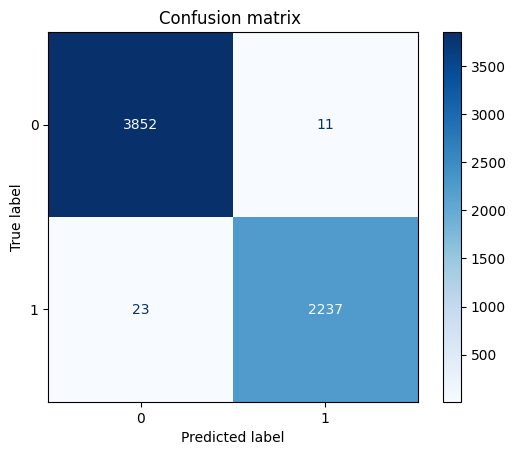

In [117]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 1. Prédiction sur les données de validation
y_val_pred = model.predict(X_val)
y_val_pred_binary = (y_val_pred > 0.5).astype(int).flatten()

# 2. Calcul des métriques sur la validation
val_accuracy = accuracy_score(y_val, y_val_pred_binary)
val_precision = precision_score(y_val, y_val_pred_binary)
val_recall = recall_score(y_val, y_val_pred_binary)
val_f1 = f1_score(y_val, y_val_pred_binary)

# 3. Affichage du rapport de classification
print("\nClassification Report (validation):\n", classification_report(y_val, y_val_pred_binary, target_names=['0', '1']))
print("Évaluation on validation set :")
print(f"Accuracy:  {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall:    {val_recall:.4f}")
print(f"F1 Score:  {val_f1:.4f}")

# 4. Matrice de confusion
cm = confusion_matrix(y_val, y_val_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title("Confusion matrix ")
plt.show()


In [98]:
model.save('/content/mlp.h5')


#### Plotting Loss and Accuracy over Epochs


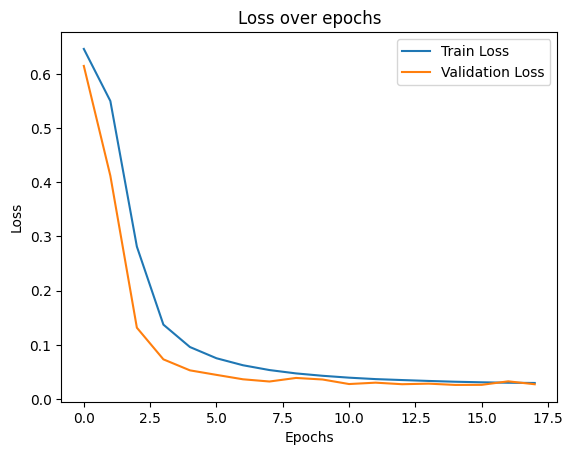

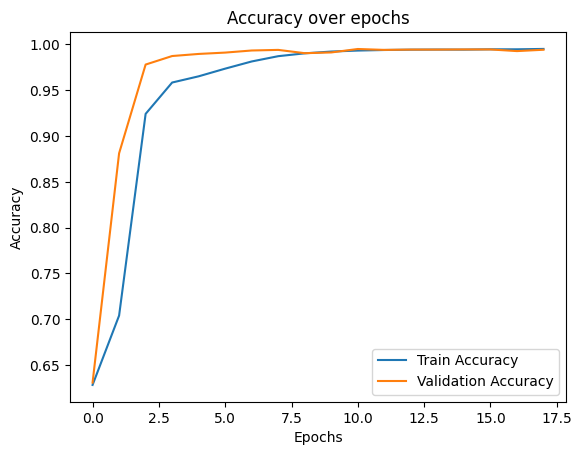

In [99]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [100]:
test_x = test['Sentence'].values
test_y = test['Label'].values
print(test.isnull().sum())


Sentence    3
Label       0
dtype: int64


In [101]:
test = test.dropna(subset=['Sentence'])



#### Filter Only SQL Injection (Label = 1)


In [102]:
# Filtrer les lignes où Label == 1
filtered = test[test['Label'] == 1]

# Supprimer les doublons en gardant la première occurrence
filtered = filtered.drop_duplicates(subset='Sentence', keep='first')

# Récupérer les 1000 exemples dans test_x et test_y
test_x = filtered['Sentence'].values
test_y = filtered['Label'].values

test_x = vectorizer.transform(test_x).toarray()


#### Prediction and Metrics Evaluation


In [103]:
predictions = model.predict(test_x)


357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [104]:
# Convertir les probabilités en classes binaires
predicted_classes = (predictions >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes.flatten())


[1 1 0 ... 1 1 1]


In [105]:
# Compter le nombre de prédictions égales à 1
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"number of query detected as SQL injection  : {nombre_de_sql_injections}")


number of query detected as SQL injection  : 11256


In [106]:
test.Label.value_counts()


,count
Label,
0,22304
1,11453


In [107]:



print(f"number of query detected as SQL injection : {nombre_de_sql_injections} / {len(test_x)}")
print(f"Accuracy  : {accuracy_score(test_y, predicted_classes) * 100:.2f}%")
print(f"Precision : {precision_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")
print(f"Recall : {recall_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")
print(f"F1 Score : {f1_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")


number of query detected as SQL injection : 11256 / 11424
Accuracy  : 98.53%
Precision : 100.00%
Recall : 98.53%
F1 Score : 99.26%


#### Filter Only Normal Queries (Label = 0)


In [108]:

filtered2 = test[test['Label'] == 0]
filtered2 = filtered2.drop_duplicates(subset='Sentence', keep='first')


test_x2 = filtered2['Sentence'].values
test_y2 = filtered2['Label'].values


test_x2 = vectorizer.transform(test_x2).toarray()

#### Prediction and Metrics Evaluation


In [109]:
predictions2 = model.predict(test_x2)


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [110]:
# Convertir les probabilités en classes binaires
predicted_classes2 = (predictions2 >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes2.flatten())


[0 0 0 ... 0 0 0]


In [111]:

nombre_de_non_sql_injections = (predicted_classes2 == 0).sum()

print(f"Nombre detected as normal query : {nombre_de_non_sql_injections}")


Nombre detected as normal query : 22195


In [112]:
test.Label.value_counts()


,count
Label,
0,22304
1,11453


In [113]:

print(f"Nombre detected as normal queries : {nombre_de_non_sql_injections} / {len(test_x2)}")

# Métriques adaptées à la classe 0
print(f"Accuracy : {accuracy_score(test_y2, predicted_classes2) * 100:.2f}%")
print(f"Precision (classe 0) : {precision_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")
print(f"Recall (classe 0) : {recall_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")
print(f"F1 Score (classe 0) : {f1_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")


Nombre detected as normal queries : 22195 / 22303
Accuracy : 99.52%
Precision (classe 0) : 100.00%
Recall (classe 0) : 99.52%
F1 Score (classe 0) : 99.76%
